<a href="https://colab.research.google.com/github/Ken-huea/image-recognition/blob/main/%E8%87%AA%E5%89%8D%E3%81%AE%E3%83%A2%E3%83%87%E3%83%AB%E8%AA%AD%E8%BE%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 今回の目的
学習したモデルをインポートしてみましょう。

毎度毎度、学習って時間がかかるじゃないですか。
なので一度学習したモデルを保存して流用しようという話です。

前回はオープンソースの<font color="red">vgg16</font>というモデルをインポートしましたが

今回は自前のモデル、あなたが作成したモデルを<font color="blue">**保存⇒読込**</font>を行う事が目標です。

###### **モデルの保存について。**

私のcolabではふんこのようにモデルの学習をしています。




```

from keras import callbacks                   # コールバック（1epoch終了毎に呼び出される）

    # 構築したモデルで学習（学習データ:trainのうち、10％を検証データ:validationとして使用）
history = model.fit(X_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_split=0.1,
                    callbacks=[
                            callbacks.EarlyStopping(monitor='val_accuracy',patience = pati_time),
                            callbacks.ModelCheckpoint(filepath = './model/best_model.h5',monitor='val_accuracy', save_best_only=True)
                            ]
                    )

```




このcallback関数を見てください。


```
callbacks.ModelCheckpoint(filepath = './model/best_model.h5',monitor='val_accuracy', save_best_only=True)
```
ここで保存されています。
val_accuracyが一番良いものを保存、現在の場所(.)から「モデル」というフォルダを作ってその中に「best_model.h5」という名前で。　ハイ、これが保存方法。私は現状この手札で事が足りております。


## 実装

### データのインポートとモデルの読込

In [1]:
# -*- coding: utf-8 -*-　モジュールインポート
import numpy as np
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import pickle

モデルの読込は下記のように行う事が出来ます。

拡張子が`.h5`なので、
- モデル構築の読込
- モデルの重みの読込

の両方が読み込めています。保存する時も読み込む時も`.h5`が無難です。

重みがいらなくてモデル構築のみインポートしたいときは？　
`hdf5` で調べてみてください。

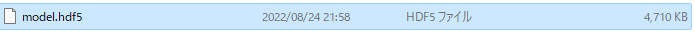

In [ ]:
# モデルの読込(Aidemy)
from tensorflow.python.keras.models import load_model

#モデルを読み込み モデルの構築と重み。
model = load_model('/content/model.h5')
model.summary() #モデル情報を出力

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

model.summaryで概要を確認した後は`model.input_shape`で入力層の確認をなさいましょう。

`(None, 28, 28, 1)` 縦28px,横28px,1です。　最後の１はカラー無しという事です。カラーの場合はRGBなので<font color="red">3</font>になります。

<font color="red">None</font> : これはkerasの場合は<font color="red">可変</font>という意味です。どんな数字でも入ります。

x_trainは`(60000, 28, 28, 1)` 今回は`(1, 28, 28, 1)` つまり<font color="red">画像の枚数</font>です。　⇒<font color="blue">Noneは画像の枚数、そしてこれは可変である。</font>

In [ ]:
model.input_shape
# None 可変、なんでもよい。指定していない。

(None, 28, 28, 1)

In [ ]:
# 15層目までの重みを固定しています。
for layer in model.layers[:15]:
    layer.trainable = False

この場合cifar10に「適合させるためには入力層をいじらないとダメみたいですね。

### インポートしたモデルを使用して検証

実際にインポートしたモデルを用いて数字を予測してみましょう。

その為にはインポートしたモデルを理解してそれに合わせた画像のリサイズ処理など多少手間が必要です。

In [ ]:
# 画像読込
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/img_9.jpg",cv2.IMREAD_GRAYSCALE)
#　この際に第二引数にて｢白黒｣で読み込む。という処理を致しております。

# これで表示。
print(img.shape)
cv2_imshow(img)

(28, 28)


In [ ]:
# 画像データのshapeをモデル用にリサイズ致します。
img = img.reshape(1, 28,28,1)
img.shape 

(1, 28, 28, 1)

In [ ]:
# 分類機に入力データを与えて予測（出力：各クラスの予想確率）
predict_y = model.predict(img)
print(predict_y)
print()
# 最も確率の高い要素番号（=予想する数字）
predict_number = np.argmax(predict_y)
print("predict_number:", predict_number)  # 予測した数字

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]

predict_number: 3


ちゃんとモデルをインポートして予測までできている事を確認致しました。

今回はモデルインポート時間短縮の為あえて単純なモデルをインポートしておりますので、精度の質はゴニョゴニョ...